# **FootBaller Wage Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/fifa_players.csv')
df.head()

,wage_eur,age,height_cm,weight_kg,nationality_name,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,320000.0,34.0,170.0,72.0,b'Argentina',93.0,93.0,85.0,95.0,70.0,...,91.0,94.0,95.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,270000.0,32.0,185.0,81.0,b'Poland',92.0,92.0,71.0,95.0,90.0,...,77.0,93.0,82.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,270000.0,36.0,187.0,83.0,b'Portugal',91.0,91.0,87.0,95.0,90.0,...,86.0,94.0,74.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,270000.0,29.0,175.0,68.0,b'Brazil',91.0,91.0,85.0,83.0,63.0,...,96.0,89.0,84.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,350000.0,30.0,181.0,70.0,b'Belgium',91.0,91.0,94.0,82.0,55.0,...,79.0,91.0,78.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0


**Shape of Dataset**

In [4]:
df.shape

(19178, 29)

**Summary of Dataset**

In [5]:
df.describe()

,wage_eur,age,height_cm,weight_kg,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,...,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000
mean,9017.989363,25.201168,181.288143,74.930493,65.760246,71.076442,49.568047,45.890239,51.773334,58.860726,...,63.505892,61.436907,64.078319,48.032433,45.890812,16.397278,16.187246,16.049067,16.221660,16.484722
std,19470.176724,4.746183,6.862150,7.065573,6.882432,6.089398,18.031017,19.718198,17.289443,14.488838,...,14.860439,9.042546,14.327970,21.227856,20.750015,17.561204,16.829124,16.555612,17.048276,17.873283
min,500.000000,16.000000,155.000000,49.000000,47.000000,49.000000,6.000000,2.000000,5.000000,7.000000,...,18.000000,25.000000,15.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1000.000000,21.000000,176.000000,70.000000,61.000000,67.000000,38.000000,30.000000,44.000000,54.000000,...,55.000000,56.000000,56.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3000.000000,25.000000,181.000000,75.000000,66.000000,71.000000,54.000000,50.000000,55.000000,62.000000,...,66.000000,62.000000,66.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,8000.000000,29.000000,186.000000,80.000000,70.000000,75.000000,63.000000,62.000000,64.000000,68.000000,...,74.000000,67.000000,74.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,350000.000000,54.000000,206.000000,110.000000,93.000000,95.000000,94.000000,95.000000,93.000000,94.000000,...,96.000000,94.000000,96.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000


**Datatypes of features**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19178 entries, 0 to 19177
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wage_eur                    19178 non-null  float64
 1   age                         19178 non-null  float64
 2   height_cm                   19178 non-null  float64
 3   weight_kg                   19178 non-null  float64
 4   nationality_name            19178 non-null  object 
 5   overall                     19178 non-null  float64
 6   potential                   19178 non-null  float64
 7   attacking_crossing          19178 non-null  float64
 8   attacking_finishing         19178 non-null  float64
 9   attacking_heading_accuracy  19178 non-null  float64
 10  attacking_short_passing     19178 non-null  float64
 11  attacking_volleys           19178 non-null  float64
 12  skill_dribbling             19178 non-null  float64
 13  skill_curve                 191

**Report:**
 - There are 19,178 rows of data.
 - There are no null values in any of the column
 - Primary objective is to find `wage_eur` of football players

## Exploratory Data Analysis
### **Feature Exploration**

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes =='O']

print(f"we have {len(numerical_features)} numerical features and they are : {numerical_features}")
print(f"we have {len(categorical_features)} categorical features and they are : {categorical_features}")

we have 28 numerical features and they are : ['wage_eur', 'age', 'height_cm', 'weight_kg', 'overall', 'potential', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
we have 1 categorical features and they are : ['nationality_name']


**Checking for Discrete and Continous numerical variables**

In [8]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
print(f"we have {len(discrete_features)} discrete numerical features and they are : {discrete_features}")

we have 0 discrete numerical features and they are : []


**Report**:

- We can see that we have no discrete numerical features
- This means that all of the numerical features we have are continous!

### **Univariate Analysis**

**Univariate analysis of Numerical Variables**

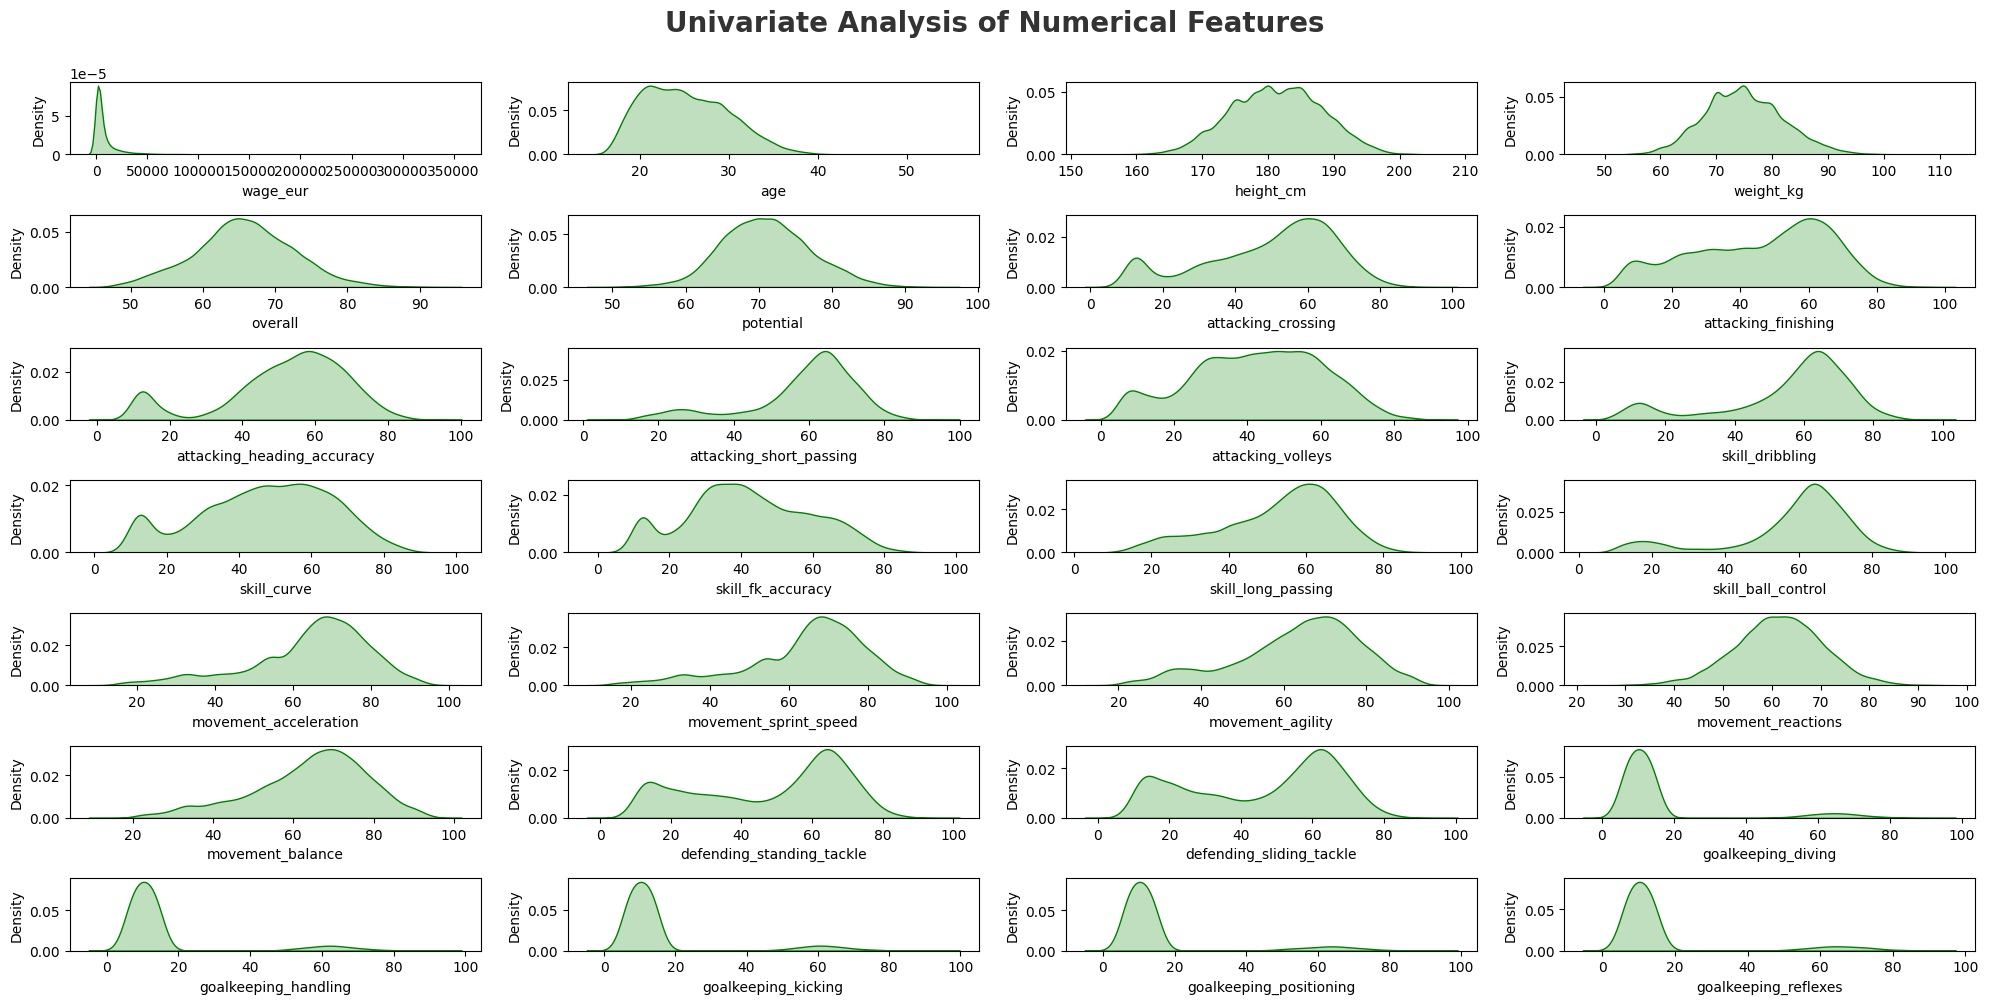

In [9]:
plt.figure(figsize=(20,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(len(numerical_features)):
    plt.subplot(7, 4, i + 1)
    sns.kdeplot(x=df[numerical_features[i]], shade=True, color='g')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

**Report**
- Target Variable `wage_eur` and all the goalkeeping related features are right skewed and also posses outliers.
- very few footballers get high wages.
- Only few of the players are goal keepers an their distributions are skewed accordingly

**Univariate Analysis of Categorical Variables**

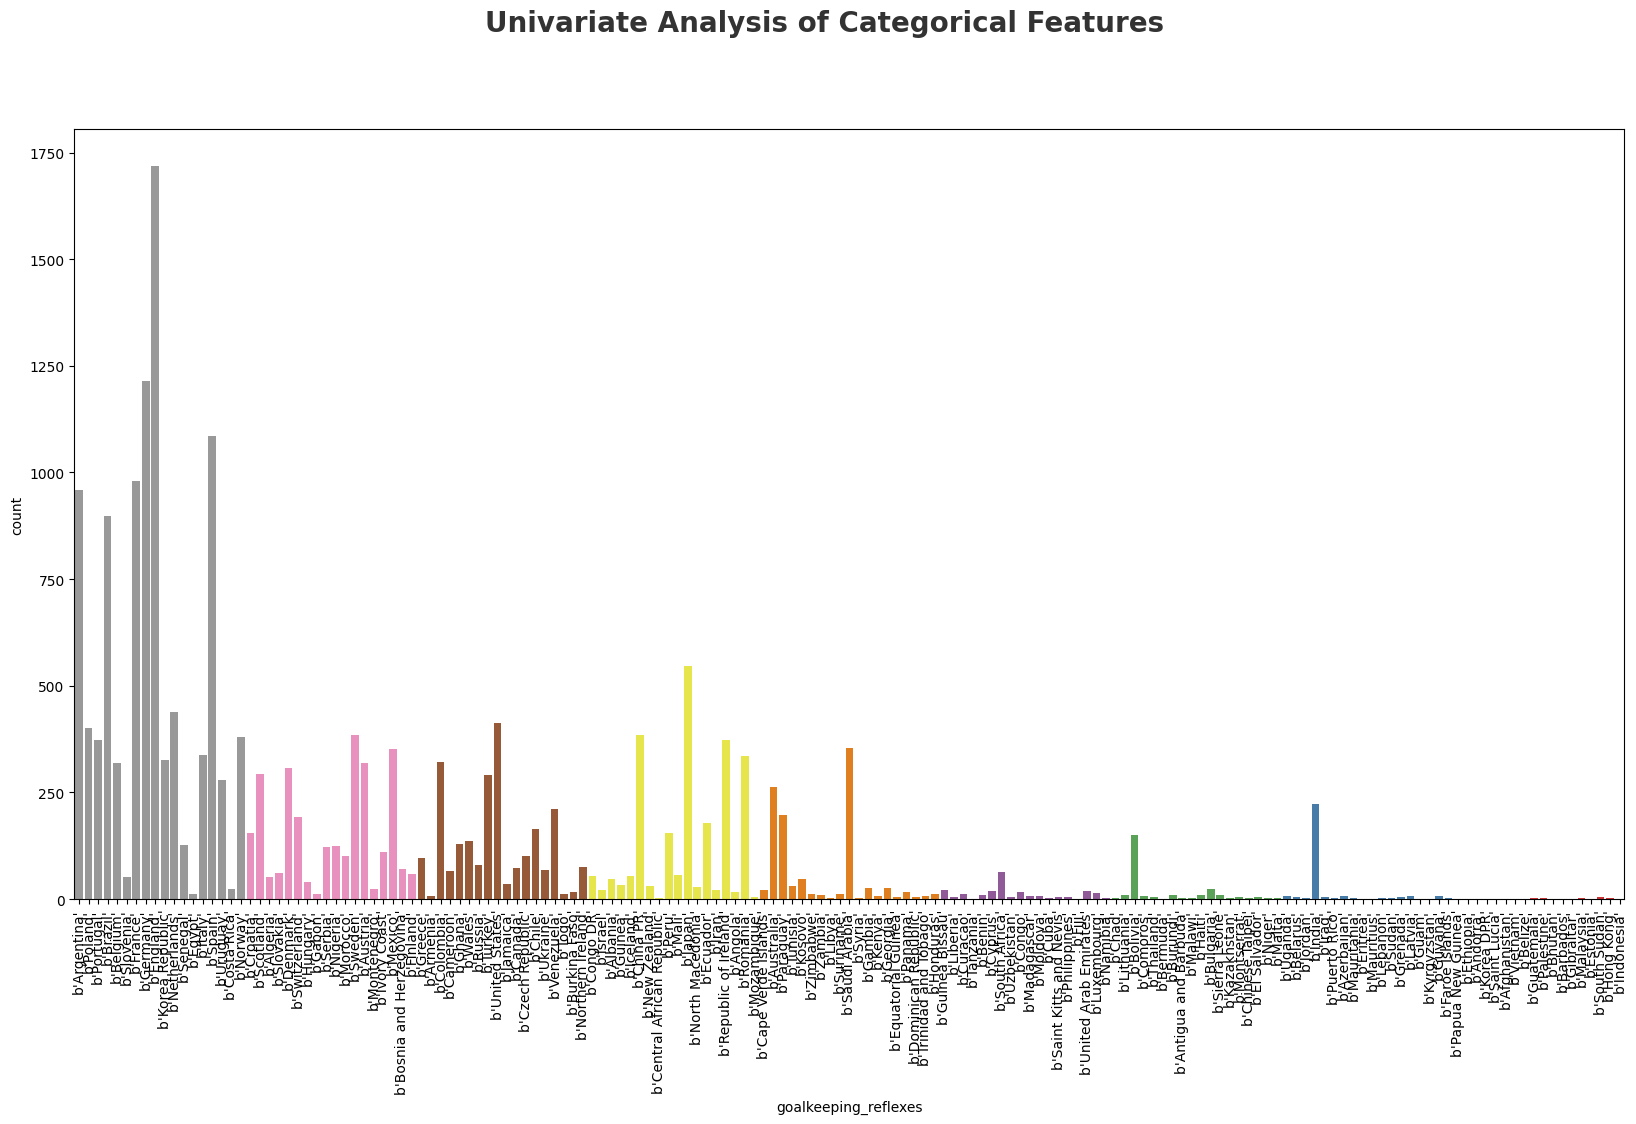

In [10]:
plt.figure(figsize=(20,10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

sns.countplot(x=df['nationality_name'], palette='Set1_r')
plt.xlabel(numerical_features[i])
plt.xticks(rotation=90)
plt.show()

### **Multivariate Analysis**
**Multicollinearity among numerical features**

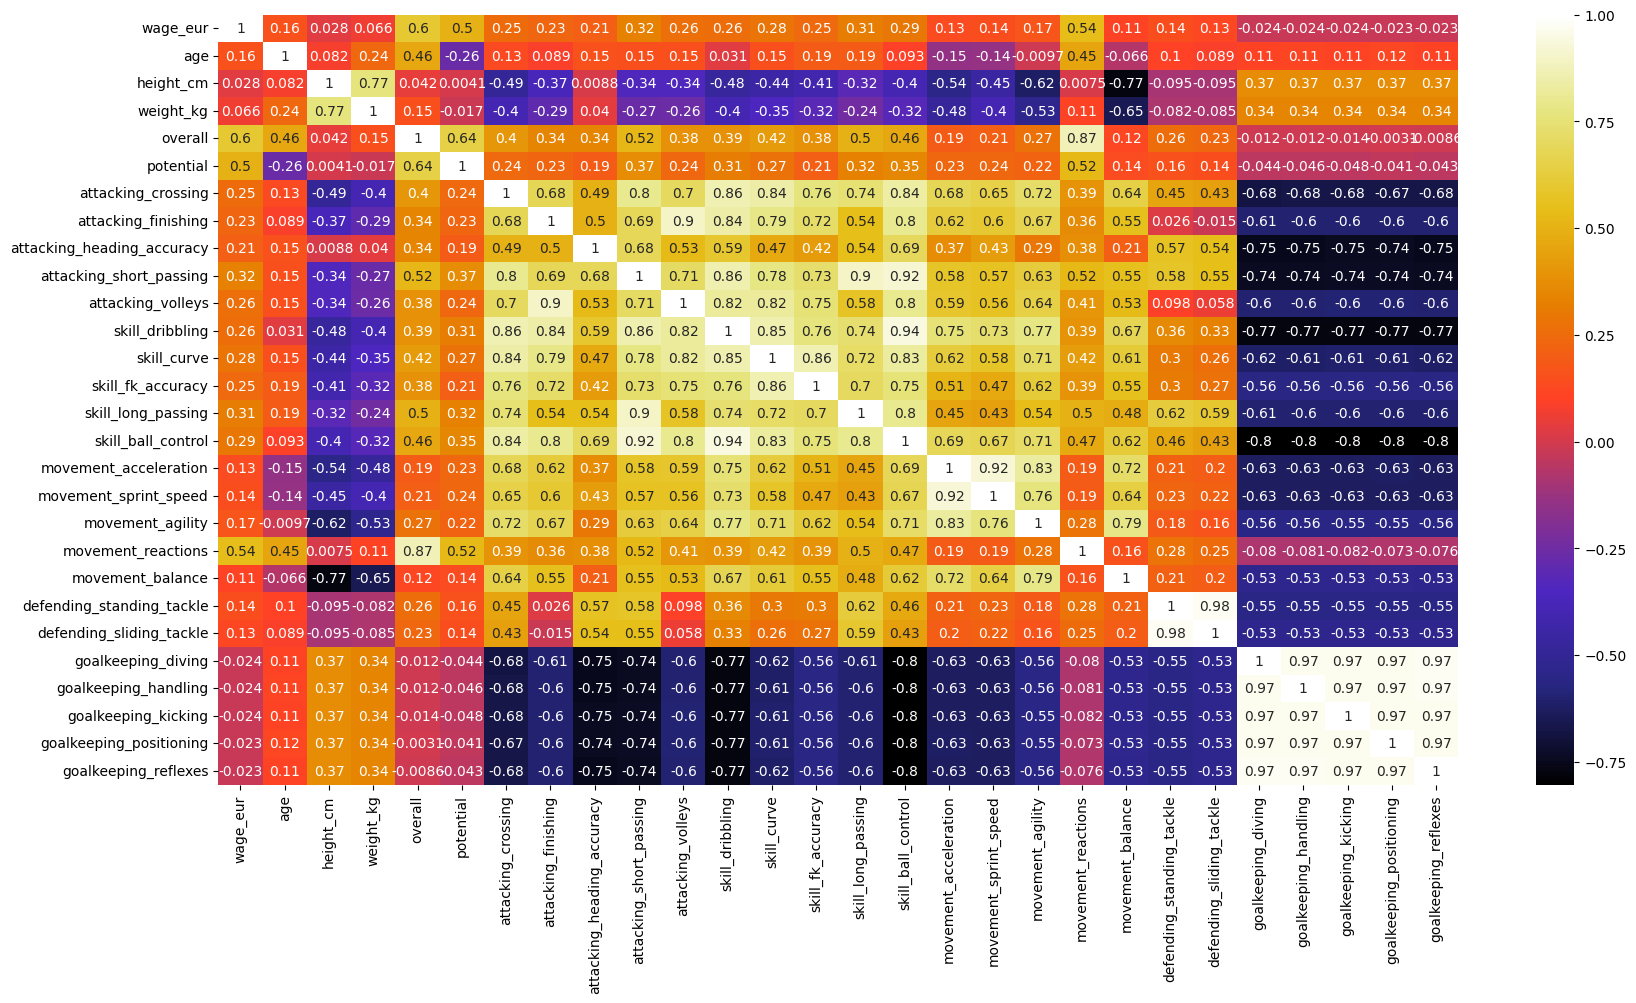

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df[numerical_features].corr(), cmap="CMRmap", annot=True)
plt.show()

**Report:**
 - All the goalkeeping related skills are corelatted with one another
 - All the goalkeeping skills are negatively correlated with other position skills
 - `ball_control` and `dribbling` features are highly correlated
 - `ball_control` and `short_passing` features are highly correlated
 - `long_passing` and `short_passing` features are highly correlated
 - `attacking_volleys` and `attacking_finishing` features are highly correlated

### **Visualization**

**Target Feature Visualization**

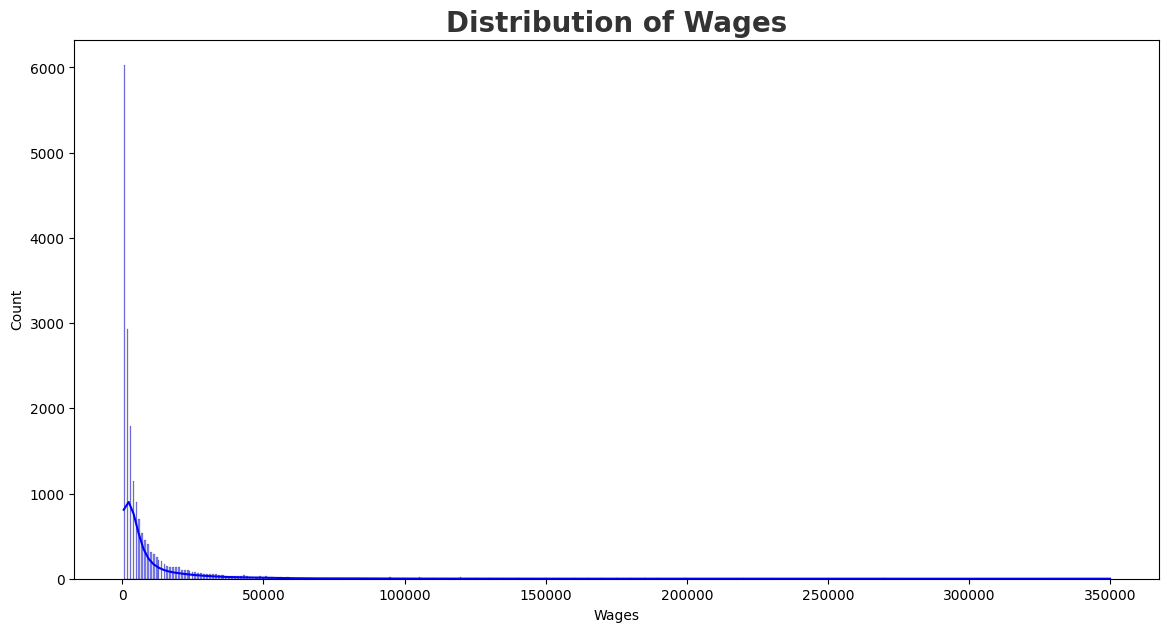

In [12]:
plt.subplots(figsize=(14,7))
sns.histplot(df['wage_eur'], kde=True, color='b')
plt.title('Distribution of Wages', fontsize=20, fontweight='bold', alpha=0.8, y=1)
plt.xlabel('Wages')
plt.show()

**Visualizing numerical features Vs Wages**

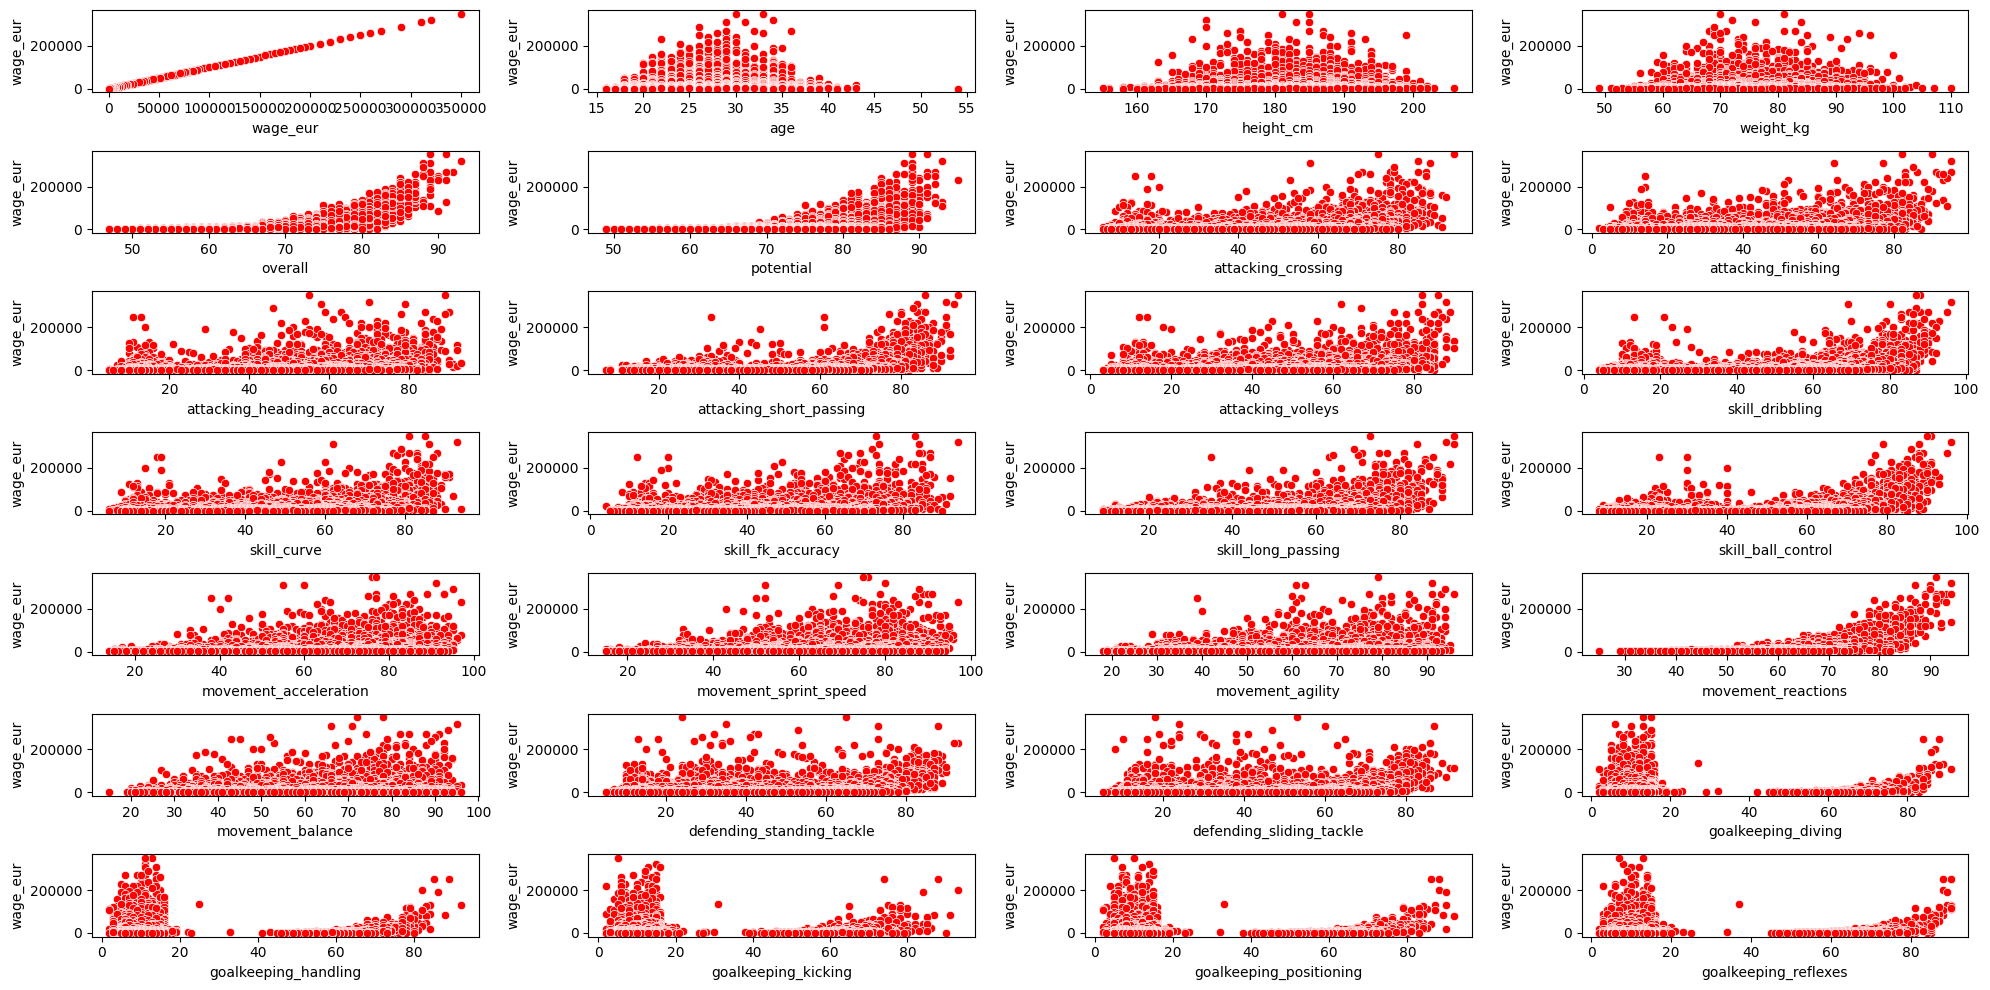

In [13]:
plt.figure(figsize=(20,10))

for i in range(len(numerical_features)):
    plt.subplot(7, 4, i+1)
    sns.scatterplot(data=df, x=numerical_features[i], y=df["wage_eur"], color='r')
    plt.tight_layout()

## Initial Exploration Report